In [1]:
from Bayesian_Neural_Network import bayesian_neural_network

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

np.random.seed(10120024)

# Data Preparation

In [2]:
data = pd.read_csv('processed_data.csv')

feature_columns = data.columns[:-1]
target_columns = data.columns[-1]

In [3]:
data_test = pd.concat((data.loc[data['Class'] == 1, :].head(25), data.loc[data['Class'] == -1].head(14215)))
data_train = data.drop(index=data_test.index)

# Bayesian Neural Network Development

## Trains The Model Using The Undersampled Train Data

In [4]:
np.random.seed(10120024)

input_layer = [len(feature_columns)]
hidden_layers = [48, 64, 32]
output_layer = [1]

total_epochs = 100
initial_lr = 1e-5
lr_decay_rate = 0.95
batch_size = 20

In [5]:
bnn = bayesian_neural_network(input_layer, 
                                hidden_layers, 
                                output_layer, 
                                data_train[feature_columns].values, 
                                data_train[target_columns].values, 
                                batch_size=batch_size,
                                initial_lr=initial_lr, 
                                lr_decay_rate=lr_decay_rate,
                                total_epochs=total_epochs)

In [6]:
bnn.train_model()

------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 1 / 100 - Learning Rate : 9.5e-06 - Succesfull Train Percentage : 100.0% - Time Passed : 466.92 Second
Accuracy : 58.49013368223028% - Precision : 0.3991307818528538% - Sensitivity : 96.35974304068522% - Standard Deviation : 0.3722128299485208
------------------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------------------
Epoch : 2 / 100 - Learning Rate : 9.025e-06 - Succesfull Train Percentage : 100.0% - Time Passed : 461.49 Second
Accuracy : 73.85712226546475% - Precision : 0.6184378821313619% - Sensitivity : 94.21841541755889% - Standard Deviation : 0.3715196946681099
-----------------------------------------

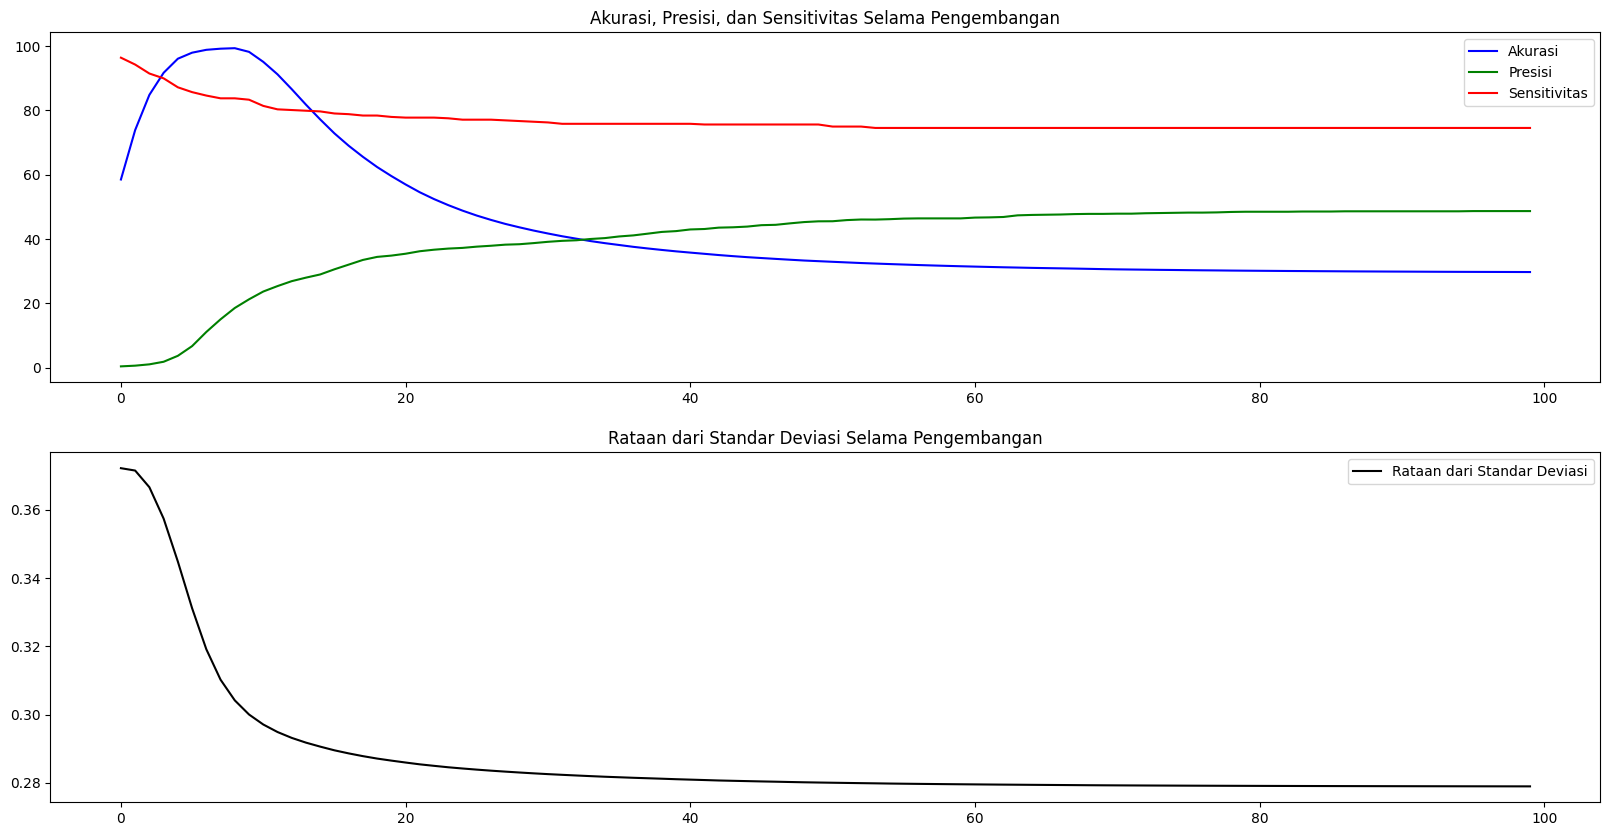

In [7]:
bnn.visualize_model_performance('performa_data_terproses_vis')

# Evaluate Model's Performance on Data

In [8]:
data_train_result, data_train_eval = bnn.predict_and_evaluate(data_train[feature_columns].values, data_train[target_columns].values)

In [9]:
data_train_eval

,Evaluation Metric,Value
0,Accuracy,29.712788
1,Precision,48.671329
2,Sensitivity,74.518201
3,Mean Standard Deviation,0.278978


In [12]:
data_test_result, data_test_eval = bnn.predict_and_evaluate(data_test[feature_columns].values, data_test[target_columns].values)

In [13]:
data_test_eval

,Evaluation Metric,Value
0,Accuracy,76.917135
1,Precision,32.394366
2,Sensitivity,92.000000
3,Mean Standard Deviation,0.374560


In [11]:
data_result, data_eval = bnn.predict_and_evaluate(data[feature_columns].values, data[target_columns].values)

In [14]:
data_eval

,Evaluation Metric,Value
0,Accuracy,32.072948
1,Precision,47.201018
2,Sensitivity,75.406504
3,Mean Standard Deviation,0.283757


In [16]:
data_result

,Prediction Mean,Prediction STD,Prediksi,Keluaran Aktual,Tingkat Kepercayaan Terhadap Prediksi (%),Kebenaran Prediksi
0,NaN,0.221440,Gagal,Tidak Fraud,NaN,False
1,NaN,0.252203,Gagal,Tidak Fraud,NaN,False
2,-1.853675,0.394180,Tidak Fraud,Tidak Fraud,100.0,True
3,NaN,0.239163,Gagal,Tidak Fraud,NaN,False
4,NaN,0.264770,Gagal,Tidak Fraud,NaN,False
...,...,...,...,...,...,...
284802,-0.432543,0.761608,Tidak Fraud,Tidak Fraud,71.5,True
284803,NaN,0.248758,Gagal,Tidak Fraud,NaN,False
284804,NaN,0.200653,Gagal,Tidak Fraud,NaN,False
284805,-2.705853,0.330323,Tidak Fraud,Tidak Fraud,100.0,True


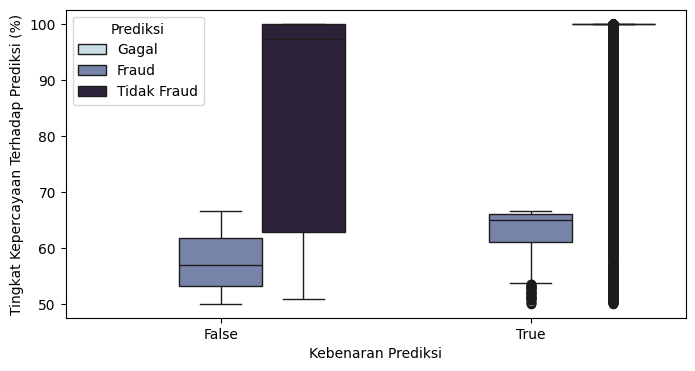

In [17]:
fig = plt.figure()
fig.set_size_inches(8, 4)
sns.boxplot(data=data_result, x='Kebenaran Prediksi', y='Tingkat Kepercayaan Terhadap Prediksi (%)', hue='Prediksi', palette="ch:s=.25,rot=-.25")
plt.savefig('kepercayaan_data_terproses_vis.png')

# 